In [1]:
import glob
import random

import numpy as np
import json
import plotly.express as px

projects_base_path = '/home/sasce/Downloads/SoftwareTopics/data/raw/'
projects_path = glob.glob(projects_base_path + '*.json')

In [2]:
def load_project_files(projects_path):
    contents = []
    project_name = []
    file_labels = []
    
    for project_path in projects_path:
        content = json.load(open(project_path, 'r'))
        project = content['name']
        files = content['versions'][0]['files']
        filenames = [file for file in files]
        identifiers = [files[file]['identifiers'] for file in filenames]
        distributions = [files[file]['annotation']['distribution'] for file in filenames]
        
        labels = [np.argmax(distribution) for distribution in distributions]
        file_labels.extend(labels)
        contents.extend([" ".join(code) for code in identifiers])
        project_name.extend([project]*len(filenames))
    return project_name, contents, file_labels

In [3]:
import re
def split_camelcase(text: str):
    return re.sub(
        '([A-Z][a-z]+)|_', r' \1', re.sub('([A-Z]+)', r' \1', text)
    ).split()


In [4]:
project_name, codes, labels = load_project_files(projects_path)

In [5]:
codes_split = [split_camelcase(code) for code in codes]
codes_split = [" ".join(code) for code in codes_split]

In [6]:
codes_split[0]

'org apache aries typedevent remote remoteservices impl java lang Boolean TRUE java util Collections empty List java util Collections empty Map java util Collections singleton Map org apache aries typedevent remote api Remote Event Constants RECEIVE REMOTE EVENTS org junit jupiter api Assertions assert Equals org junit jupiter api Assertions assert Null org osgi framework Framework Util create Filter java util Arrays java util Dictionary java util Hash Map org apache aries typedevent remote remoteservices spi Remote Event Bus org junit jupiter api After Each org junit jupiter api Before Each org junit jupiter api Test org mockito Argument Captor org mockito Mock org mockito Mockito org mockito Mockito Annotations org osgi framework Bundle Context org osgi framework Invalid Syntax Exception org osgi framework Service Reference org osgi framework Service Registration org osgi service typedevent Typed Event Bus Suppress Warnings Remote Event Bus Impl Test Mock Bundle Context context Mock 

In [7]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("flax-sentence-embeddings/stackoverflow_mpnet-base")


.gitattributes:   0%|          | 0.00/737 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [8]:
embeddings = embedding_model.encode(codes, show_progress_bar=True)

Batches:   0%|          | 0/3650 [00:00<?, ?it/s]

In [9]:
precomputes = np.array(embeddings)
with open('precomputes_so_mpnet.npy', 'wb') as f:
    np.save(f, precomputes)
#embeddings_split = embedding_model.encode(codes_split, show_progress_bar=True)

In [10]:
with open('precomputes_so_mpnet.npy', 'rb') as f:
    precomputes = np.load(f)

In [11]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [12]:

embeddings = precomputes

In [13]:
embeddings = np.array(embeddings)

In [14]:
# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.5, metric='cosine', random_state=42).fit(embeddings)
#reduced_embeddings_split = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit(embeddings_split)

/home/sasce/anaconda3/envs/SoftwareTopics/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [15]:
labels_plot = []
seen = {}
for name in project_name:
    if name not in seen:
        seen[name] = len(seen)
    labels_plot.append(seen[name])
labels_plot = np.array(labels_plot)
names = {seen[name]: name for name in seen}

/home/sasce/anaconda3/envs/SoftwareTopics/lib/python3.10/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


<Axes: >

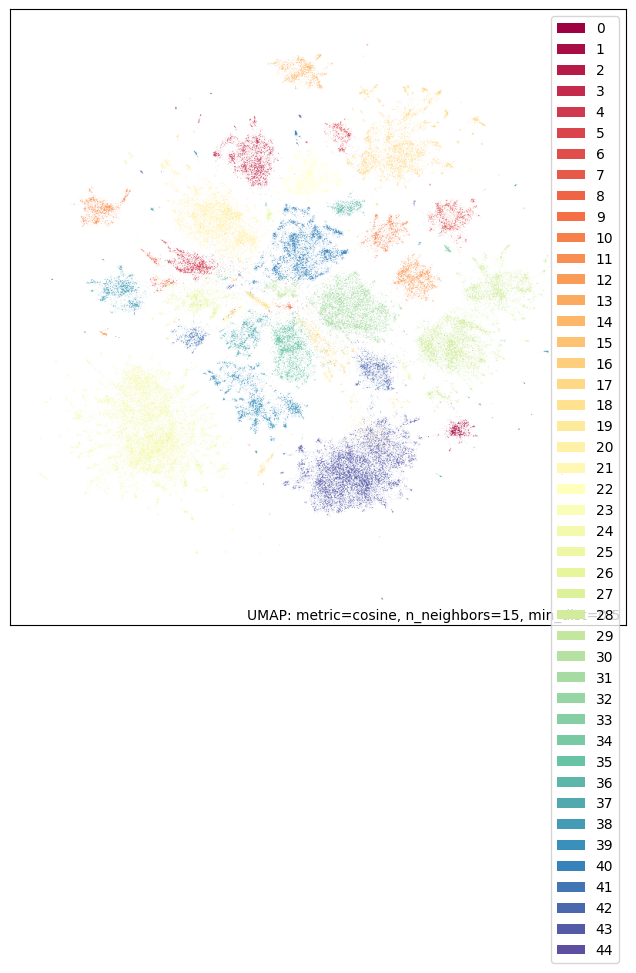

In [16]:
import umap.plot
umap.plot.points(reduced_embeddings, labels=labels_plot)

<Axes: >

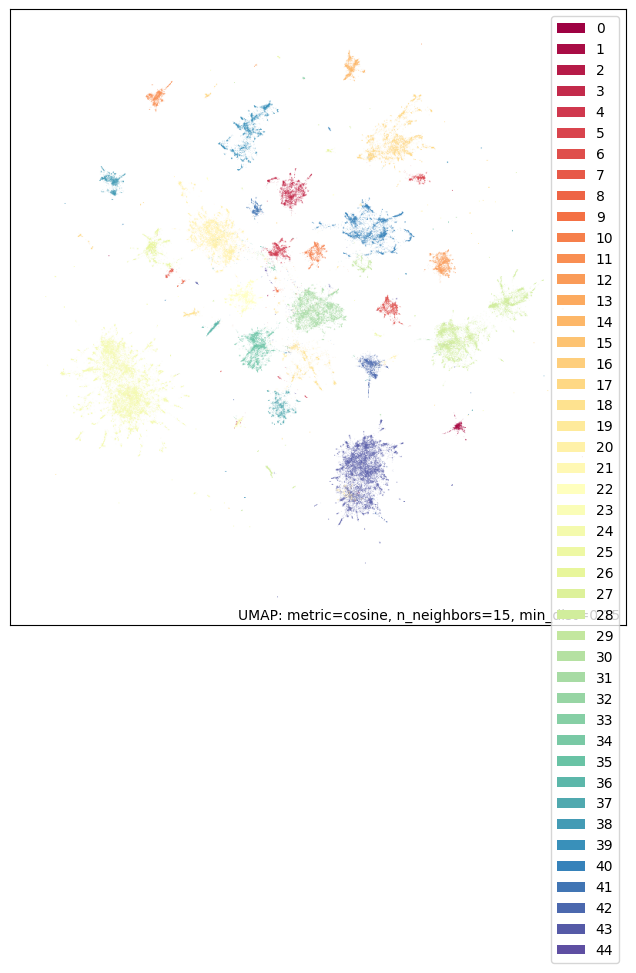

In [17]:
# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.15, metric='cosine').fit(embeddings)

umap.plot.points(reduced_embeddings, labels=labels_plot)

AttributeError: 'list' object has no attribute 'shape'

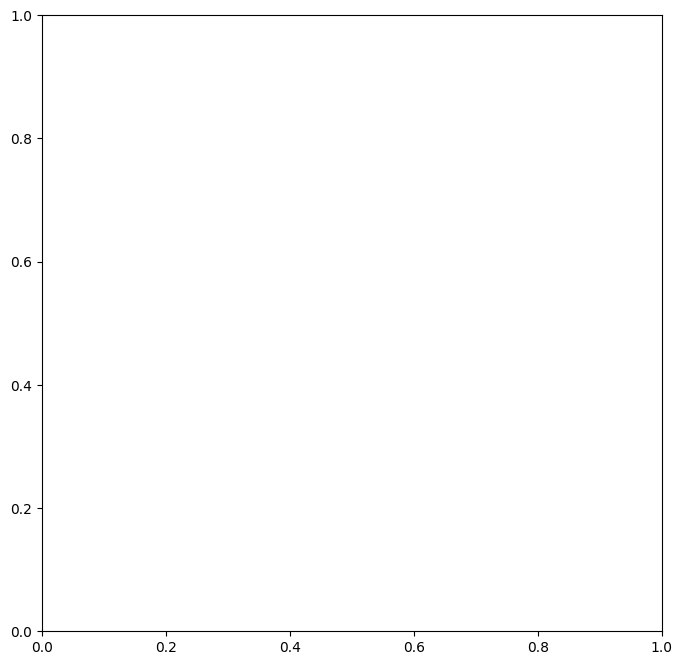

In [18]:
umap.plot.points(reduced_embeddings, labels=labels)

In [ ]:
# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(densmap=True, n_neighbors=15, n_components=3, min_dist=0.15, metric='cosine').fit_transform(embeddings)